Principal Component Analysis

In [1]:
import numpy as np

FEATURE_FILES = [
    "features_rgbw.npy", "features_hog.npy", "features_lbp.npy", "features_fda.npy",
    "features_ela.npy", "features_lbpv.npy", "features_colorgamut.npy", "features_fractal.npy"
]

# Print the shape of each feature set
for f in FEATURE_FILES:
    data = np.load(f)
    print(f"{f}: shape {data.shape}")

features_rgbw.npy: shape (79950, 4)
features_hog.npy: shape (79950, 4)
features_lbp.npy: shape (79950, 4)
features_fda.npy: shape (79950, 4)
features_ela.npy: shape (79950, 4)
features_lbpv.npy: shape (79950, 4)
features_colorgamut.npy: shape (79950, 4)
features_fractal.npy: shape (79950, 4)


In [2]:
import numpy as np
from sklearn.decomposition import PCA
from tqdm import tqdm

FEATURE_FILES = [
    "features_rgbw.npy", "features_hog.npy", "features_lbp.npy", "features_fda.npy",
    "features_ela.npy", "features_lbpv.npy", "features_colorgamut.npy", "features_fractal.npy"
]
CACHE_FILE = "all_pca.npy"

# Load all feature sets with a progress bar
features_list = []
for f in tqdm(FEATURE_FILES, desc="Loading Feature Files"):
    features_list.append(np.load(f))

# Concatenate features
features = np.concatenate(features_list, axis=1)

# Apply PCA
print("Applying PCA...")
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features)

# Save
np.save(CACHE_FILE, features_pca)
print(f"✅ Saved PCA features to {CACHE_FILE}")


Loading Feature Files: 100%|██████████| 8/8 [00:00<00:00, 1599.73it/s]

Applying PCA...
✅ Saved PCA features to all_pca.npy


Plot

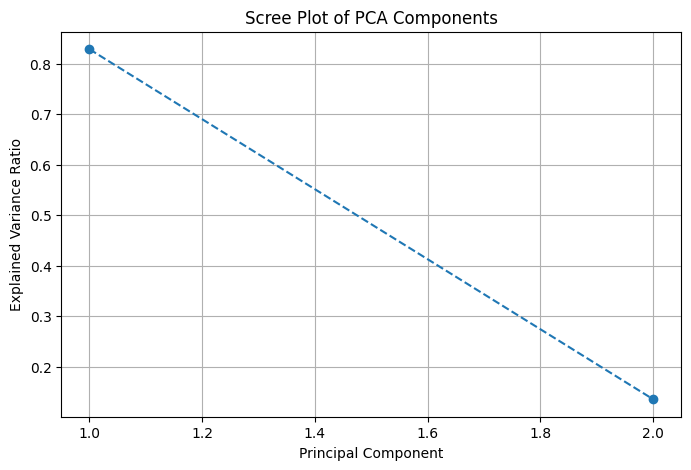

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA Components")
plt.grid()
plt.show()

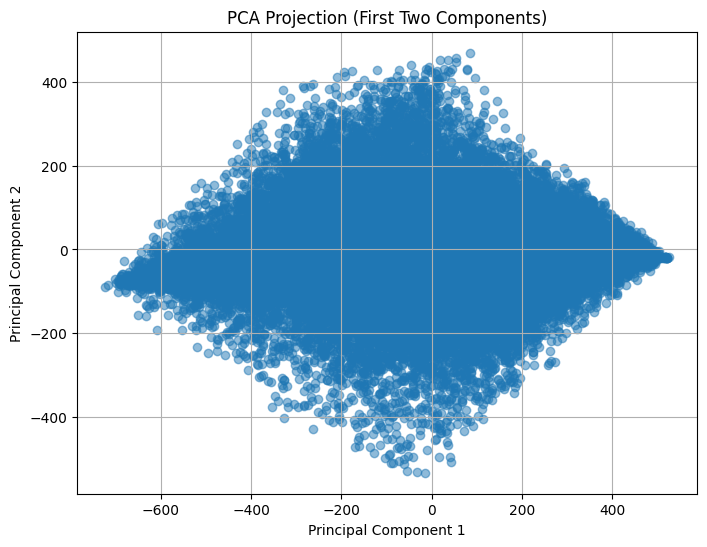

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (First Two Components)")
plt.grid()
plt.show()